In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('ggplot')

In [27]:
df = pd.read_csv('StudentsPerformance.csv')

# EDA

In [4]:
df.head() # View the top few rows to have a quick look at what the data is like

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info() # Look at how our data is structured

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Just making life easier when referencing column names
df.columns = df.columns.str.replace(" ", "_")

In [7]:
df.shape # How many rows do we have? 1000 tells us we're unlikely to have NaN

(1000, 8)

In [8]:
df.isnull().sum() # This confirms this

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
df.describe() # What do our summary statistics look like? Do any of them look strange? Are there any outliers?
# Is there any missing data that's not a NaN?

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


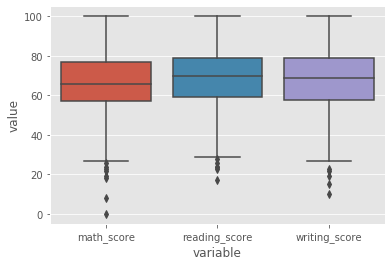

In [10]:
bx = sns.boxplot(x = 'variable', y = 'value', data = pd.melt(df[['math_score', 'reading_score', 'writing_score']]))

# Another look for any outliers - 0 for math might be worth looking at quickly

In [11]:
df['math_score'].value_counts() 

# One student scoring 0 is reasonable, so I won't delete

65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math_score, Length: 81, dtype: int64

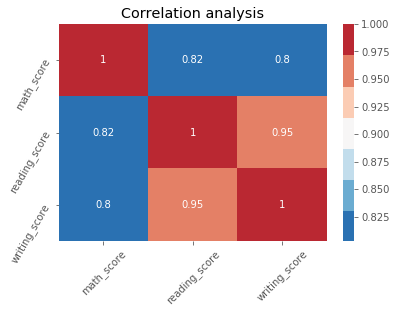

In [16]:
# All grades are highly correlated, with a particularly high correlation between writing and reading scores

cmap = sns.color_palette("RdBu_r", 7)
plt.figure()
plt.title('Correlation analysis')
sns.heatmap(df.corr(), cmap = cmap, annot = True)
plt.xticks(rotation = 45)
plt.yticks(rotation = 60)
plt.show()

# Deeper Analysis - what variables are meaningful?

In [19]:
# Importing relevant modules

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [25]:
# Splitting our data

X = df.drop(['math_score', 'reading_score', 'writing_score'], axis = 1)
y_math = df[['math_score']]
y_reading = df[['reading_score']]
y_writing = df[['writing_score']]

## A quick Lasso regression to check if there are any variables that don't contribute much

# The problem looks to be that all of the independent variables are categorical. It may be more valuable to do ANOVA.

# Specifically, Factorial ANOVA looks to be helpful.

## Note: Maybe a pipeline would help make this easier for the other subjects?
## Maybe we can use cross_val_score() instead of train_test_split() ?

### Next steps:
* Learn how to do Factorial ANOVA
* Create a pipeline for factorial ANOVA
* Apply that pipeline to all 3 scores

In [30]:
lasso = Lasso()
X_train, X_test, y_train_math, y_test_math = train_test_split(X, y_math, test_size = 0.3, random_state = 42)

In [ ]:
lasso.fit(X_train, y_train_math)
y_math_pred = lasso.predict(X_test)

In [ ]:
sns.heatmap()